# Predictive modeling - final exam summer term 2024

**Date**: 6.7.2024

**Matriculation number**: Please assign your matriculation number to the variable `matriculation_number` by replacing the digits `123` in the cell below with your 8 digits matriculation number. Please do not delete the quotation marks so that the variable is a `string` and not an `int`.

In [ ]:
# your 8-digits matriculation number between the quotation marks, then run the cell
matriculation_number = "12345678"

## Instructions (please read this part carefully)
- This exam is carried out in this Jupyter Notebook. All tasks are part of the notebook, all your answers are saved in this notebook.
- Please make sure that you enter your **matriculation number** in the cell above.
- At the end of the exam **please run the last cell of this notebook** to make sure the notebook is **exported to PDF**. It is not a problem if you run this cell more than 1 time, each time you run it, the current version of the notebook is exported to PDF while the previous one is overwritten.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from ISLP.models import ModelSpec as MS

from sklearn.model_selection import(
    KFold,
    cross_validate
)

from sklearn.linear_model import(
    LinearRegression,
    Lasso
)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

## Introducing the dataset
In this exam we are going to work with the `DWD` dataset which contains wheather information from different wheather stations in Germany.

Our objective is to predict the variable **`MEAN ANNUAL RAINFALL`** based on the other variables in the dataset.

The DWD data set consists of 599 rows, each of them representing a particular weather station in Germany, and 21 columns, each of them corresponding to a variable/feature related to that particular weather station. These self-explaining variables are: 
- 'DWD_ID',
- 'STATION NAME',
- 'FEDERAL STATE',
- 'LAT',
- 'LON',
- 'ALTITUDE' above NHN, in m,
- 'PERIOD',
- 'RECORD LENGTH',
- 'MEAN ANNUAL AIR TEMP' in degree Celsius,
- 'MEAN MONTHLY MAX TEMP' in degree Celsius,
- 'MEAN MONTHLY MIN TEMP' in degree Celsius,
- 'MEAN ANNUAL WIND SPEED',
- 'MEAN CLOUD COVER',
- 'MEAN ANNUAL SUNSHINE',
- 'MEAN ANNUAL RAINFALL' in mm,
- 'MAX MONTHLY WIND SPEED',
- 'MAX AIR TEMP' in degree Celsius,
- 'MAX WIND SPEED',
- 'MAX RAINFALL' in mm,
- 'MIN AIR TEMP',
- 'MEAN RANGE AIR TEMP'.

The data was downloaded from the DWD (German Weather Service) data portal on April 21, 2017. Please note that the data set was preprocessed and columns have been renamed.

In [ ]:
# please run this cell to load the data
dwd = pd.read_csv(
    'DWD.csv',
    index_col=0,
    sep=',',
)
dwd

# Part 1: Data Preprocessing and Data Exploration

## Task 1 (2 points)
In the two code cells below some very basic data preprocessing is performed. Run the cells. Then describe the preprocessing steps and explain why these steps seem reasonable with the objective in mind that we want to predict the variable `MEAN_ANNUAL_RAINFALL`.

*Hint*: The documentation of the Pandas method [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) might be useful.

In [ ]:
dwd.info()

In [ ]:
# Please run this cell to perform the data preprocessing
dwd = dwd.drop(['DWD_ID', 'STATION_NAME', 'FEDERAL_STATE', 'PERIOD'], axis=1)
dwd = dwd.dropna()
dwd.shape

*Put your description here*

## Task 2 (2 points)
Use the Pandas method [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) to compute the (Pearson) correlation coefficients between the variables remaining after preprocessing and our target variable `MEAN_ANNUAL_RAINFALL`.

Based on this, which are your 3 top choices you would include into a regression model to predict `MEAN_ANNUAL_RAINFALL`?

In [ ]:
# Your code here

*Your top 3 variables here*

# Part 2: Modeling
We are now going to create a baseline regression model to predict `MEAN_ANNUAL_RAINFALL`.

## Task 3 (2 points)
Create a simple linear regression model for the response variable `MEAN_ANNUAL_RAINFALL` using `ALTITUDE` as unique predictor. Use [`statsmodels.OLS`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) for creating your model and use the [`summary()`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.summary.html) method to output the summary information on your model.

In [ ]:
# Your code here

## Task 4 (4 points)
In this task we investigate further our baseline model.

### Task 4.1 (1 point)
What is the regression coefficient for the predictor variable `ALTITUDE`? How would you explain this coefficient to a fellow student who has never heard of linear regression models?

In [ ]:
# Your coefficient here

*Your explanation of the coefficient here*

### Task 4.2 (1 point)
Is there statistical evidence that there is a relationship between the predictor variable `ALTITUDE` and the response variable `MEAN_ANNUAL_RAINFALL`? Justify your answer.

*Your answer here*

### Task 4.3 (1 point)
Ingolstadt lies on an average altitude of 374m above NHN. Compute your model's prediction of the yearly average rainfall at Ingolstadt.

(As a side note not relevant for your answer: The true mean yearly rainfall in Ingolstadt based on average data from 2005-2015 is 574.1 mm).

In [ ]:
# Your code here

### Task 4.4 (1 point)
What is your overall assessment of the model (taking into account the model summary produced in Task 3, the regression plot and the residual plot visualized below)?

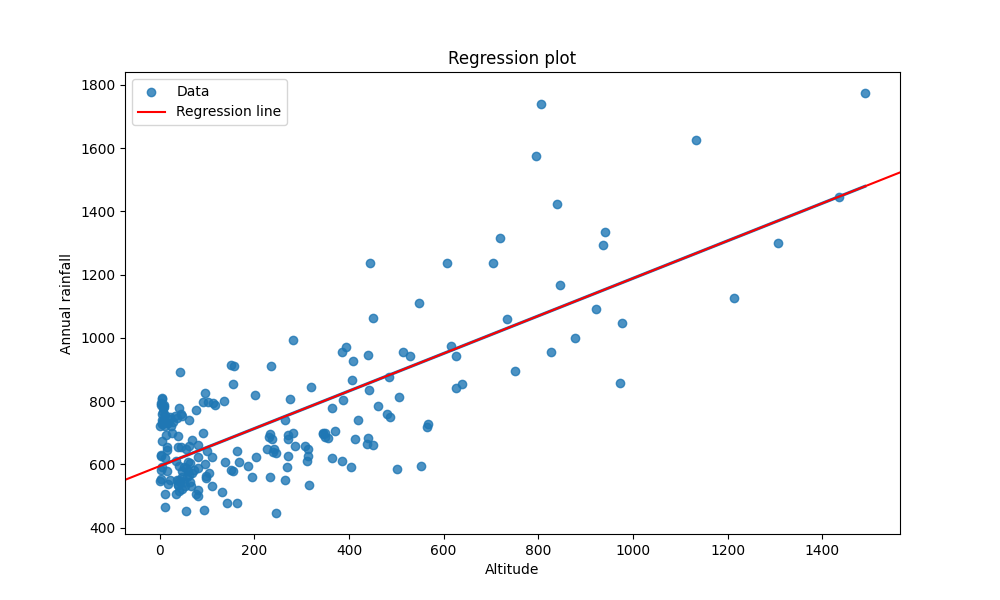

In [6]:
# run this cell in case no image is displayed
Image(filename='regression_plot.png') 

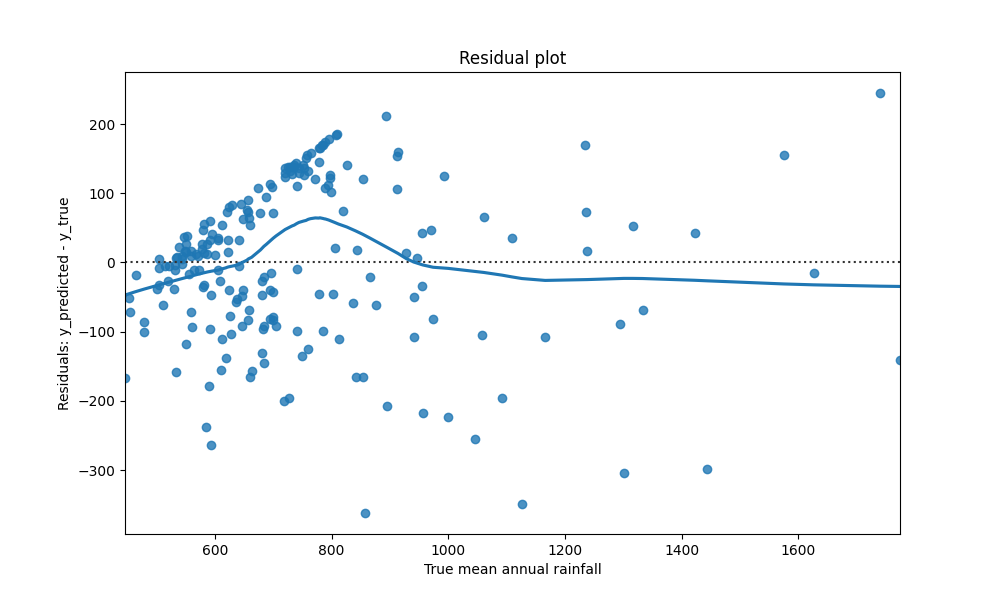

In [7]:
# run this cell in case no image is displayed
Image(filename='residual_plot.png') 

*Your assessment here*

# Part 3: Comparing various models
In this section we compare different models with $5$-fold cross validation.

## Task 5 (2 points)
Estimate the test error of our baseline model from Part 2 (simple linear regression to predict `MEAN_ANNUAL_RAINFALL` based on the single predictor `ALTITUDE`) using $5$-fold cross validation. Make sure your data is shuffled before doing cross validation.

*Comments*: 
- We use [`sklearn.model_selection.KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) as a cross validator.
- We use [`sklearn.model_selection.cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) to compute the cross validation test errors.
- Note that we use the scoring metric `neg_mean_squared_error` (see the [overview of Metrics and scoring](https://scikit-learn.org/stable/modules/model_evaluation.html)) which produces negative values for reasons of consistency within ScikitLearn.
- For consistency with subsequent tasks we use [`sklearn.linearmodels.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) instead of `sm.OLS` for the simple linear regression model.

In [ ]:
# In this cell, replace ... with your code
cross_val = KFold(...)
model = LinearRegression()
X = dwd[['ALTITUDE']] # note: Sklearn wants a DataFrame not a Series as X, which is why we use a double square bracket
y = dwd.MEAN_ANNUAL_RAINFALL
cv_results = cross_validate(model,
                           X,
                           y,
                           cv = cross_val,
                           scoring = 'neg_mean_squared_error')
cv_err_baseline = ...
cv_err_baseline

## Task 6 (1 point)
In Task 7 we are going to train a Lasso model. Before doing so, we need to preprocess our data using the sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) which will be part of a sklearn [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

Explain what the `StandardScaler` does to the data and **why** it is necessary to perform this step before training a Lasso model.

*Your explanation here*

## Task 7 (1 point)
In the cell below, a vector `cv_err_Lasso` is computed. Run the cell. Then provide a detailed explanation of the entries of this vector.

In [ ]:
# Just run this cell. Do not change it.
alphas_L = np.arange(0.5, 2, 0.01)
n = len(alphas_L)
cv_err_Lasso = np.zeros(len(alphas_L))

cv = KFold(n_splits = 5,
                  shuffle = True,
                  random_state = 42)

X = dwd.drop(['MEAN_ANNUAL_RAINFALL'], axis=1)

for i in range(n):
    a = alphas_L[i]
    model = make_pipeline(StandardScaler(), Lasso(alpha=a))
    cv_results = cross_validate(model,
                               X,
                               y,
                               cv = cv,
                               scoring = 'neg_mean_squared_error')
    cv_err_Lasso[i] = - np.mean(cv_results['test_score'])

*Your explanation here*

## Task 8 (1 point)
Based on what you have seen above: Which model would you use to predict `MEAN_ANNUAL_RAINFALL` with the predictors given in the `DWD` dataset? Provide all parameters necessary to train this model.

In [ ]:
# Free space for code if needed

*Your answer here*

# Part 4: Conceptual questions

## Task 9 (2 points)
Assume you train a logistic regression model to predict if it is raining in the following day ($y=1$) or not ($y=0$) based on three predictors: 
- $x_1 = \text{cumulated amount of rain in the past 24 hours}$,
- $x_2 = \text{summer}$ (dummy-encoded with $1$ meaning it is currently summer) and
- $x_3 = \text{percentage of cloud cover in the past 24 hours}$. 

The estimated coefficients of your model are $\beta_0  = 0, \beta_1 = 0.02, \beta_2 = 0.015, \beta_3 = 0.02$. What does your model predict on a winter day if $x_1 = 10$ and $x_3 = 80$? Justify your answer.

In [ ]:
# Free space for code if needed

*Your answer here*

## Task 10 (3 points)
Assume you have trained a simple linear regression model to estimate the mean yearly rainfall depending of a location based on its altitude. Explain carefully all steps you would need to perform in oder to estimate the standard deviation of your model's prediction for the city of Ingolstadt located a an altitude of 374m using **the bootstrap**.

*Your answer here*

# Part 5: Handing your exam in

## Task 11 (0 points)
Save your final Notebook by pressing "File"->"Save Notebook". Make sure you assigned your 8 digits matriculation number as a string to the variable `matriculation_number` in one of the first cells of this notebook.  

After this, run the cell below to export you Notebook to PDF format.

In [ ]:
filename = str(matriculation_number) + '_exam.pdf'
!jupyter nbconvert Exam.ipynb --to pdf --output $filename

---

**Copyright note**: The dataset, the prerpocessing and the idea for this case study are taken from the SOGA-Py project of the Department of Earth Sciences from Freie Universität Berlin by Annette Rudolph, Joachim Krios and Kai Hartmann. They are shared under a Creative Commons license.